## Specific humidity - hus

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

from plotFuncs_metric import *

In [2]:
variables = [
    'pw_tMean',
    'pw_sMean'
    ]


model = 'GFDL-CM3'
snapshot = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ variables[0] +'_historical.nc')['pw_snapshot']
tMean = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_' + variables[0] +'_historical.nc')[variables[0]]
sMean = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_' + variables[1] +'_historical.nc')[variables[1]]
aWeights = np.cos(np.deg2rad(tMean.lat))

### snapshot of variable

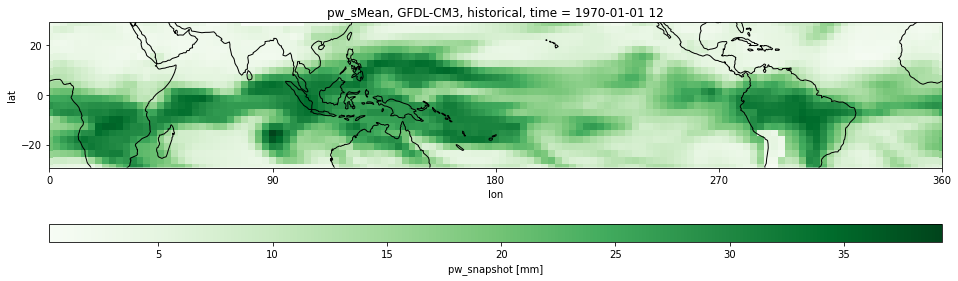

In [3]:
scene = snapshot
cmap= "Greens"
title = variables[1] + ', ' + model + ', historical, ' + 'time = ' + str(scene.coords['time'].values)[:13] 
vmin = np.min(scene)
vmax = np.max(scene)
plot_scene(scene, cmap, title, vmin, vmax)

### time mean

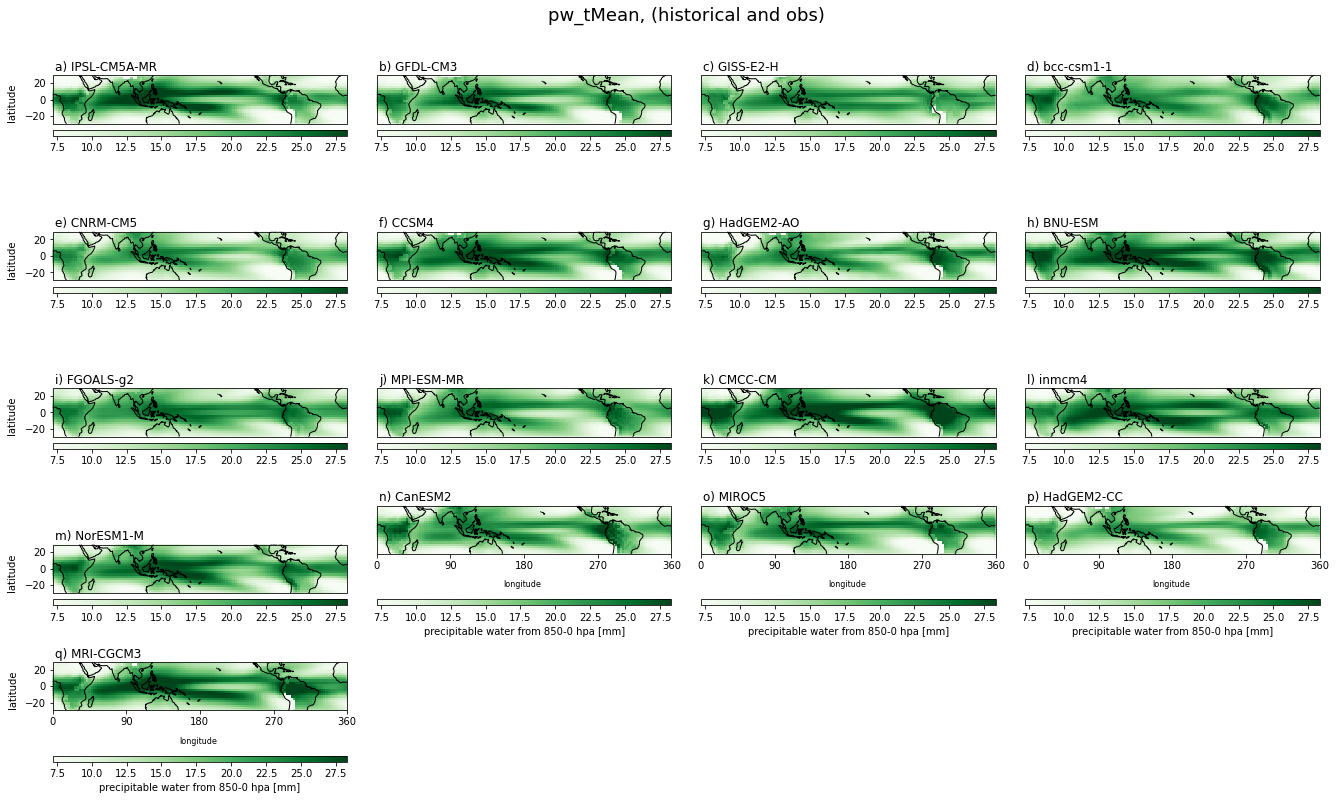

In [4]:
scene_types = [
    'experiment',
    # 'diff'
]
scene_type = scene_types[0]


models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]

ds = xr.Dataset()
for model in models:
    if scene_type == 'experiment':
        cmap = "Greens"
        plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ variables[0]+ '_' + experiment + '.nc')[variables[0]]
        
    if scene_type == 'diff':
        cmap = "RdBu_r"
        historical = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ variables[0] +'_historical.nc')[variables[0]]
        rcp =  xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_' +variables[0]+ '_rcp85.nc')[variables[0]]
        plot_var = xr.DataArray(
            data  = (rcp.data-historical.data),
            dims=['lat', 'lon'],
            coords={'lat': historical.lat.data, 'lon': historical.lon.data},
            attrs = {'units': '\u00B0C'})
        
    ds[model] = plot_var

for obs in observations:
    if scene_type == 'experiment':
        plot_var = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_'+ variables[0] +'_.nc')[variables[0]]
        ds[obs] = plot_var


vmin, vmax = [], []
for dataset in list(ds.data_vars.keys()):
    vmin = np.append(vmin, ds[dataset].quantile(0.10,dim=('lat','lon')))
    vmax = np.append(vmax, ds[dataset].quantile(0.90,dim=('lat','lon')))
vmin = np.min(vmin)
vmax = np.max(vmax)


title = variables[0] + ', (' + experiment + ' and obs)'
plot_scenes(ds, cmap, title, vmin=vmin, vmax=vmax)


### spatial mean

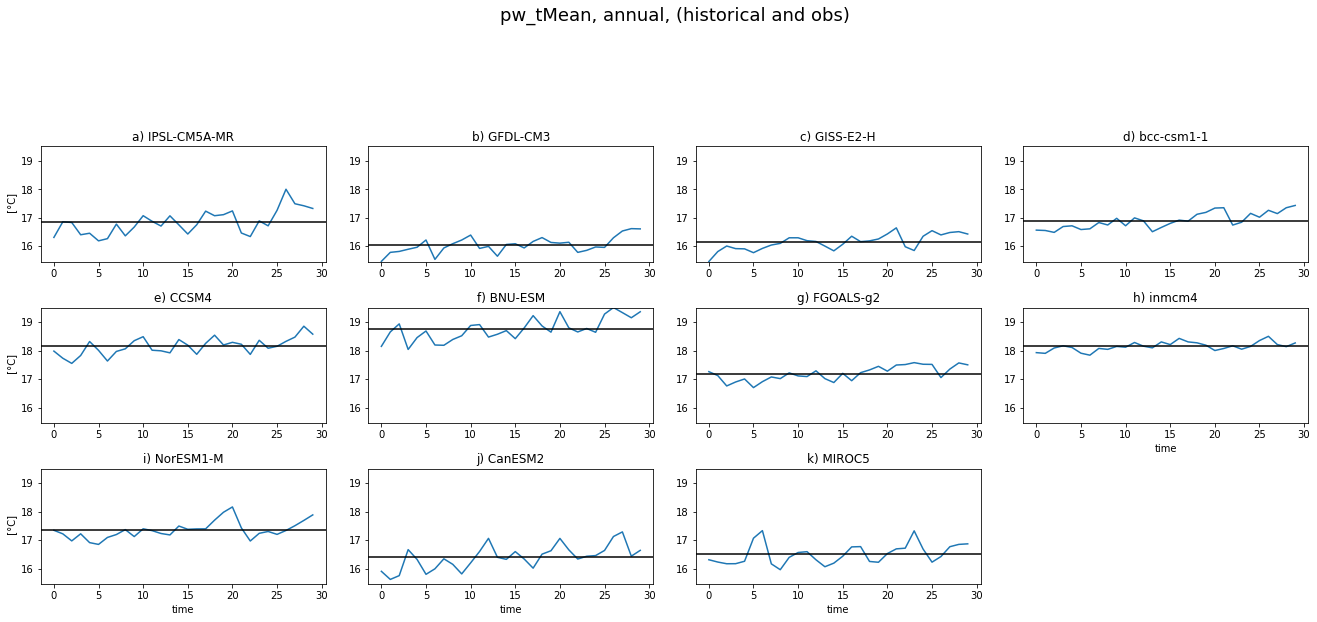

In [13]:
timeMean_options = [
    'annual',
    # 'season',
    # 'season_mean',
    # 'month',
    # 'month_mean',
    # 'day',
    ]
timeMean_option = timeMean_options[0]

# calendars = {
#     'IPSL-CM5A-MR': 'noleap',
#     'GFDL-CM3': 'noleap',
#     'GISS-E2-H': 'noleap',
#     'bcc-csm1-1': 'noleap',
#     'CNRM-CM5': 'proleptic_gregorian',
#     'CCSM4': 'noleap',
#     'HadGEM2-AO': '360_day',
#     'BNU-ESM': 'noleap',
#     'FGOALS-g2': 'noleap',
#     'MPI-ESM-MR': 'proleptic_gregorian',
#     'CMCC-CM': 'proleptic_gregorian',
#     'inmcm4': 'noleap',
#     'NorESM1-M': 'noleap',
#     'CanESM2': 'noleap',
#     'MIROC5': 'noleap',
#     'HadGEM2-CC': '360_day',
#     'MRI-CGCM3': 'proleptic_gregorian'
# }



models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]
    
ds = xr.Dataset()
for model in models:
    plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ variables[1] +'_' + experiment + '.nc')[variables[1]]
    plot_var = resample(plot_var, timeMean_option)
    plot_var.attrs['units']= 'mm'
    ds[model] = plot_var


for obs in observations:
    plot_var = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_'+ variables[1] +'_.nc')[variables[1]]
    plot_var = resample(plot_var, timeMean_option)
    ds[obs] = plot_var


ymin, ymax = [], []
for dataset in list(ds.data_vars.keys()):
    ymin = np.append(ymin, ds[dataset].min())
    ymax = np.append(ymax, ds[dataset].max())
ymin = np.min(ymin)
ymax = np.max(ymax)


title = variables[0] + ', ' + timeMean_option + ', (' + experiment + ' and obs)'
ylabel=''
plot_timeseries_multiple(ds, timeMean_option, title, ylabel, ymin, ymax)

In [7]:
for model in models:
    plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ variables[1] +'_' + experiment + '.nc')[variables[1]]
    
    print(model, ':',  plot_var['time'].encoding['calendar'])

IPSL-CM5A-MR : noleap
GFDL-CM3 : noleap
GISS-E2-H : noleap
bcc-csm1-1 : noleap
CNRM-CM5 : proleptic_gregorian
CCSM4 : noleap
HadGEM2-AO : 360_day
BNU-ESM : noleap
FGOALS-g2 : noleap
MPI-ESM-MR : proleptic_gregorian
CMCC-CM : proleptic_gregorian
inmcm4 : noleap
NorESM1-M : noleap
CanESM2 : noleap
MIROC5 : noleap
HadGEM2-CC : 360_day
MRI-CGCM3 : proleptic_gregorian


In [15]:
# import cftime

# def create_time_dimension(time, calendar):
#     if calendar == 'noleap':
#         return cftime.date2num(time, 'days since 1950-01-01', calendar='noleap')
#     elif calendar == '360_day':
#         return cftime.date2num(time, 'days since 1950-01-01', calendar='360_day')
#     elif calendar == 'proleptic_gregorian':
#         return time.astype('datetime64[D]').astype(float)

# # Create a dictionary with the models and their respective calendars
# calendars = {
#     'IPSL-CM5A-MR': 'noleap',
#     'GFDL-CM3': 'noleap',
#     'GISS-E2-H': 'noleap',
#     'bcc-csm1-1': 'noleap',
#     'CNRM-CM5': 'proleptic_gregorian',
#     'CCSM4': 'noleap',
#     'HadGEM2-AO': '360_day',
#     'BNU-ESM': 'noleap',
#     'FGOALS-g2': 'noleap',
#     'MPI-ESM-MR': 'proleptic_gregorian',
#     'CMCC-CM': 'proleptic_gregorian',
#     'inmcm4': 'noleap',
#     'NorESM1-M': 'noleap',
#     'CanESM2': 'noleap',
#     'MIROC5': 'noleap',
#     'HadGEM2-CC': '360_day',
#     'MRI-CGCM3': 'proleptic_gregorian'
# }

# # Create an empty xarray dataset
# ds = xr.Dataset()

# # Loop through each model and add its timeseries to the dataset
# for model, calendar in calendars.items():
#     # Load the xarray data array for the model
#     da = xr.open_dataarray(f'{model}.nc')
    
#     # Convert the time dimension to a common calendar
#     time = create_time_dimension(da['time'], calendar)
    
#     # Add the time series to the dataset
#     da['time'] = time
#     ds[model] = da

### time mean and spatial mean

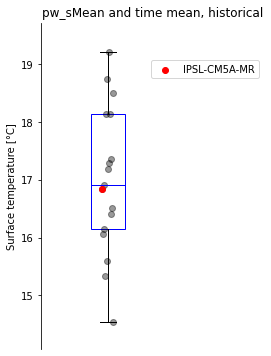

In [16]:
scene_types = [
    'experiment',
    # 'diff'
]
scene_type = scene_types[0]

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]

ds = xr.Dataset()
ds.attrs['units']= '\u00B0C'
for model in models:
    if scene_type == 'experiment':
        cmap = "Reds"
        plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ variables[1] +'_' + experiment + '.nc')[variables[1]].mean(dim='time')

    if scene_type == 'diff':
        cmap = "RdBu_r"
        historical = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ variables[1] +'_historical.nc')[variables[1]]
        rcp =  xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ variables[1] +'_rcp85.nc')[variables[1]]
        plot_var = (rcp.data-historical.data)

    ds[model] = plot_var
        

ymin, ymax = [], []
for dataset in list(ds.data_vars.keys()):
    ymin = np.append(ymin, ds[dataset].min())
    ymax = np.append(ymax, ds[dataset].max())
ymin = np.min(ymin) - 0.10*(np.max(ymax) - np.min(ymin))
ymax = np.max(ymax) + 0.10*(np.max(ymax) - np.min(ymin))


labels =[
    'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    #,'darkred',
    # 'b', 
    # 'g'
    ]

title = variables[1] + ' and time mean, ' + experiment
ylabel='Surface temperature'

boxplotColor(ds, labels, colors, title, ylabel, ymin, ymax)